# Generate K-V beam

In [1]:
import numpy as np
import pandas as pd
import holoviews as hv
from scipy import interpolate

hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

Фазовый эллипс распределения Капчинского-Владимирского, описывающий пучок, до преобразования задается уравнением вида: 

$$
\frac{x^2}{x^2_{max}} + \frac{y^2}{y^2_{max}} + \frac{{x'}^2}{{x'}^2_{max}} + \frac{{y'}^2}{{y'}^2_{max}} = 1
$$

где $\epsilon$ -- ненормализованный эмиттанс, $x_{max}$ -- радиус пучка.

Это распределение можно генерировать [методом Мюллера](https://anaconda.org/nikiforov/hypersphere_point_picking/notebook).

In [2]:
Rb = 40 # beam radius (mm)

eps = 10.5e-3 # emittance (mm)

gamma = 4.91

mc = 0.511 # MeV/c

pz = gamma*mc # MeV/c

I = 0.000002 # A

In [3]:
x_max = Rb # mm
xp_max = (eps/x_max) # (rad)
y_max = x_max # mm
yp_max = xp_max # (rad)

In [4]:
Np = 50000 # The number of macro particles in ASTRA distribution

In [5]:
q1 = np.random.normal(loc=0.0, scale=1.0, size=Np)
q2 = np.random.normal(loc=0.0, scale=1.0, size=Np)
q3 = np.random.normal(loc=0.0, scale=1.0, size=Np)
q4 = np.random.normal(loc=0.0, scale=1.0, size=Np)

In [6]:
n = np.sqrt(q1*q1 + q2*q2 + q3*q3 + q4*q4)

In [7]:
q1 = q1/n
q2 = q2/n
q3 = q3/n
q4 = q4/n

In [8]:
x = q1*x_max
y = q2*y_max
xp = q3*xp_max
yp = q4*yp_max

In [9]:
dim_x = hv.Dimension('x', unit='mm')

dim_xp = hv.Dimension('xp', unit='mrad', label="x'")

dim_y = hv.Dimension('y', unit='mm')

dim_yp = hv.Dimension('yp', unit='mrad', label="y'")

In [10]:
%output size=200 backend='matplotlib' fig='png' dpi=100

%opts Scatter [show_grid=True aspect=3] (alpha=0.5 s=3.0)

:Scatter   [x,xp]   (y)
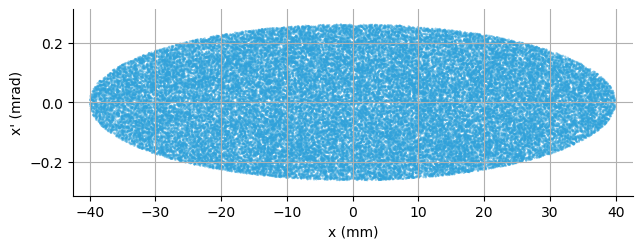

In [11]:
hv.Scatter((x,xp*1000), kdims=[dim_x,dim_xp])

:Scatter   [y,yp]   (y)
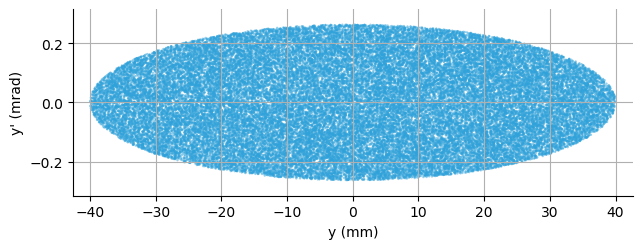

In [12]:
hv.Scatter((y,yp*1000), kdims=[dim_y,dim_yp])

:Scatter   [x,y]   (y)
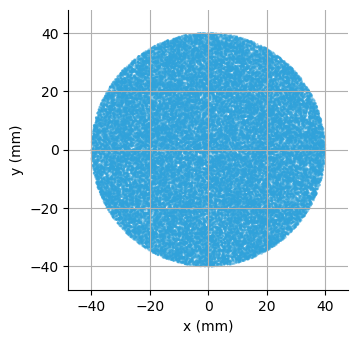

In [13]:
%output size=100 
hv.Scatter((x,y), kdims=[dim_x,dim_y]).opts(aspect=1)

:Scatter   [xp,yp]   (y)
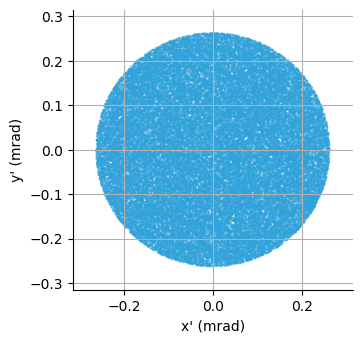

In [14]:
hv.Scatter((xp*1e3,yp*1e3), kdims=[dim_xp,dim_yp]).opts(aspect=1)

:Scatter   [x,yp]   (y)
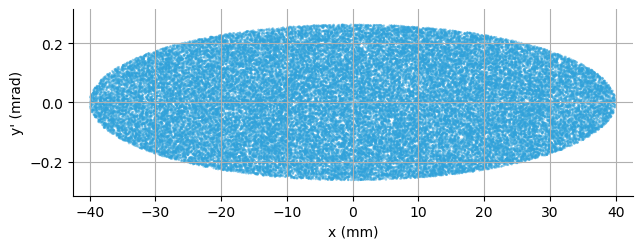

In [15]:
%output size=200 
hv.Scatter((x,yp*1e3), kdims=[dim_x,dim_yp])

In [16]:
ns = 1e-9  # nanosecond
ps = 1e-12 # picosecond
nC = 1e-9  # nanocoulomb

In [17]:
Pulse_duration = 0.1e-3*ps
Beam_charge = I*Pulse_duration # Coulomb 
macro_charge = Beam_charge/nC/Np

print('Beam_charge = %.0f nC, macro_charge = %.3f nC' % (Beam_charge/nC , macro_charge))

Beam_charge = 0 nC, macro_charge = 0.000 nC


In [18]:
clock = np.random.uniform(low=-Pulse_duration/2/ps, high=Pulse_duration/2/ps, size=Np) # ns

## Saving data to ASTRA format

ASTRA data format is described in <a href=http://www.desy.de/~mpyflo/Astra_manual/Astra-Manual_V3.2.pdf>ASTRA manual</a> on page. 2:

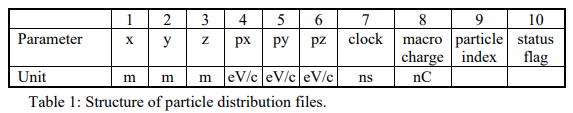

In [19]:
df = pd.DataFrame()

In [20]:
df['x']  = x/1e3  # m
df['y']  = y/1e3  # m
df['z']  = 0/1e3  # m
df['px'] = xp*pz*1e6 # eV/c
df['py'] = yp*pz*1e6 # eV/c
df['pz'] = pz*1e6 # eV/c
df['clock'] = clock # ns
df['macro_charge'] = (-1)*macro_charge # nC
df['particle_index'] = 1 # electron
df['status_flag'] = -1

In [21]:
df0 = df.head(1) # ref. particle
df  = df.drop(df0.index)

In [22]:
df0

,x,y,z,px,py,pz,clock,macro_charge,particle_index,status_flag
0,0.013123,0.016494,0.0,-132.220295,543.92286,2509010.0,-0.000016,-4.000000e-18,1,-1


In [23]:
df.head(3)

,x,y,z,px,py,pz,clock,macro_charge,particle_index,status_flag
1,0.026173,-0.010484,0.0,-409.828514,-224.280445,2509010.0,0.000038,-4.000000e-18,1,-1
2,-0.008550,0.031008,0.0,-374.018249,115.757370,2509010.0,-0.000046,-4.000000e-18,1,-1
3,-0.023371,-0.031554,0.0,96.161477,80.759025,2509010.0,-0.000023,-4.000000e-18,1,-1


In [24]:
df['pz'] = df['pz']-df0['pz'][0]

In [25]:
df.head(3)

,x,y,z,px,py,pz,clock,macro_charge,particle_index,status_flag
1,0.026173,-0.010484,0.0,-409.828514,-224.280445,0.0,0.000038,-4.000000e-18,1,-1
2,-0.008550,0.031008,0.0,-374.018249,115.757370,0.0,-0.000046,-4.000000e-18,1,-1
3,-0.023371,-0.031554,0.0,96.161477,80.759025,0.0,-0.000023,-4.000000e-18,1,-1


In [26]:
df = df0.append(df)

In [27]:
df.head(3)

,x,y,z,px,py,pz,clock,macro_charge,particle_index,status_flag
0,0.013123,0.016494,0.0,-132.220295,543.922860,2509010.0,-0.000016,-4.000000e-18,1,-1
1,0.026173,-0.010484,0.0,-409.828514,-224.280445,0.0,0.000038,-4.000000e-18,1,-1
2,-0.008550,0.031008,0.0,-374.018249,115.757370,0.0,-0.000046,-4.000000e-18,1,-1


In [28]:
df.tail(3)

,x,y,z,px,py,pz,clock,macro_charge,particle_index,status_flag
49997,0.025742,0.007549,0.0,-468.914234,137.096921,0.0,-0.000018,-4.000000e-18,1,-1
49998,0.036623,-0.008498,0.0,198.116263,-106.454676,0.0,0.000032,-4.000000e-18,1,-1
49999,-0.031692,0.019673,0.0,-160.199732,-175.737561,0.0,-0.000007,-4.000000e-18,1,-1


In [29]:
df.to_csv('Beam.ini', sep=' ', header=False, float_format='%+.4E', index=False)

In [30]:
!jupyter nbconvert --to HTML generate_ASTRA_beam.ipynb

[NbConvertApp] Converting notebook generate_ASTRA_beam.ipynb to HTML
[NbConvertApp] Writing 2674307 bytes to generate_ASTRA_beam.html
